# Titanic dataset with TensorFlow

### 1. Getting the dataset and importing necessary tools

In [163]:
# Importing all the tools needed
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [164]:
# Load the data into Pandas DataFrame
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [165]:
# Basic info about dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
titanic.describe() # outputs only numeric columns 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Engineering features

It's easy to see that most places where the data is missing are two columns: Age (approx. 200 entries missing) and Cabin (approx. 700 entires missing). This has to be dealt with before we start to try and find any correlations in this dataset.<br><br>
First of all, let's deal with the 'Cabin' column.

In [167]:
# View the data in Cabin columns and inspect it
titanic['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Looks like there is a pattern - either NaNs or a symbol containing a letter (probably deck or part of the ship) and number (probably the cabin number od given deck). Let's try to extract the letters first.

In [168]:
# Function to extract the first letter of cabin
def extract_first_letter(cabin):
	'''
	Extracting the first letter from a given cabin number. If the input is
	different, function returns 'NaN'.
	'''
	if type(cabin) == type('a'):
		return cabin[0]
	return 'X'

In [169]:
titanic['Cabin_letter'] = titanic['Cabin'].apply(lambda x: extract_first_letter(x))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,X


In [170]:
# Function to extract the number of the cabin
def extract_cabin_number(cabin):
	'''
	Extracting the number of the cabin. If there's none, returns NaN.
	'''
	if type(cabin) == type('a'):
		return cabin[1:]
	return 0

In [171]:
# Apply the function over the 'Cabin' column
titanic['Cabin_number'] = titanic['Cabin'].apply(lambda x: extract_cabin_number(x))

# Change datatype to numeric
titanic['Cabin_number'] = pd.to_numeric(titanic['Cabin_number'], errors='coerce')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter,Cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,X,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,X,0.0


Having this done we can drop the 'Cabin' column as it no longer contains data we might need. Next up - creating a 'Family size' column.

In [172]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0


In [173]:
# Creating a 'Family size' column by adding the 'SibSp' and 'Parch' values
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0,0


<AxesSubplot: xlabel='Family_size', ylabel='Count'>

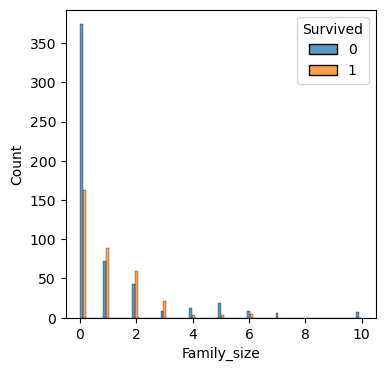

In [174]:
plt.figure(figsize=(4,4))
sns.histplot(x='Family_size', 
			 hue='Survived',
			 data=titanic,
			 multiple='dodge')

Most of the passengers were singles, as we can see above. It's also easy to guess that most of the survivors were from this group. However, it's interesting that for family sizes between 1 and 3 included, there were more survivors that casualities. The trend reversed from value of 4 upwards.<br><br>
Now let's deal with the 'Age' column.

In [175]:
# Take a look at the data
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

There are two ways - either to fill the missing values with mean value of the column or try to find another corresponding feature to distinguish people by. Let's investigate.

In [176]:
# Take a look at the whole DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0,0


In [177]:
# Looks like every title is being held with a comma at the end
for i in range(20):
	print(titanic['Name'][i].split())

['Braund,', 'Mr.', 'Owen', 'Harris']
['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)']
['Heikkinen,', 'Miss.', 'Laina']
['Futrelle,', 'Mrs.', 'Jacques', 'Heath', '(Lily', 'May', 'Peel)']
['Allen,', 'Mr.', 'William', 'Henry']
['Moran,', 'Mr.', 'James']
['McCarthy,', 'Mr.', 'Timothy', 'J']
['Palsson,', 'Master.', 'Gosta', 'Leonard']
['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)']
['Nasser,', 'Mrs.', 'Nicholas', '(Adele', 'Achem)']
['Sandstrom,', 'Miss.', 'Marguerite', 'Rut']
['Bonnell,', 'Miss.', 'Elizabeth']
['Saundercock,', 'Mr.', 'William', 'Henry']
['Andersson,', 'Mr.', 'Anders', 'Johan']
['Vestrom,', 'Miss.', 'Hulda', 'Amanda', 'Adolfina']
['Hewlett,', 'Mrs.', '(Mary', 'D', 'Kingcome)']
['Rice,', 'Master.', 'Eugene']
['Williams,', 'Mr.', 'Charles', 'Eugene']
['Vander', 'Planke,', 'Mrs.', 'Julius', '(Emelia', 'Maria', 'Vandemoortele)']
['Masselmani,', 'Mrs.', 'Fatima']


In [178]:
# Title itself can be extracted by a simple function then
def title_extraction(title):
	temp = title.split()

	for i in range(len(temp)):
		if '.' in temp[i]:
			return temp[i].split('.')[0]

In [179]:
# Applying the function
titanic['Title'] = titanic['Name'].apply(lambda x: title_extraction(x))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0,0,Mr


In [180]:
# Inspecting the values per each title
titanic.groupby('Sex')['Title'].value_counts()

Sex     Title   
female  Miss        182
        Mrs         125
        Mlle          2
        Countess      1
        Dr            1
        Lady          1
        Mme           1
        Ms            1
male    Mr          517
        Master       40
        Dr            6
        Rev           6
        Col           2
        Major         2
        Capt          1
        Don           1
        Jonkheer      1
        Sir           1
Name: Title, dtype: int64

In [181]:
# Now to try and shorten the list, let's create a function to help us with this
def title_condensation(data):
	if data['Title'] in ['Miss', 'Mlle', 'Ms']:
		return 'Miss'
	
	elif data['Title'] in ['Mrs', 'Countess', 'Lady', 'Mme']:
		return 'Mrs'

	elif data['Title'] == 'Dr' and data['Sex'] == 'female':
		return 'Mrs'
		
	else:
		return 'Mr'

In [182]:
titanic['Title_condensed'] = titanic.apply(title_condensation, axis=1)
titanic.groupby('Sex')['Title_condensed'].value_counts()

Sex     Title_condensed
female  Miss               185
        Mrs                129
male    Mr                 577
Name: Title_condensed, dtype: int64

In [8]:
# Getting the mean per each condensed title
miss_mean = titanic.groupby('Title_condensed')['Age'].mean()['Miss']
mr_mean = titanic.groupby('Title_condensed')['Age'].mean()['Mr']
mrs_mean = titanic.groupby('Title_condensed')['Age'].mean()['Mrs']
miss_mean, mr_mean, mrs_mean

(21.845637583892618, 30.72664459161148, 35.99107142857143)

In [184]:
titanic['Age_nan_True'] = titanic['Age'].isna()
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size,Title,Title_condensed,Age_nan_True
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0,1,Mr,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0,1,Mrs,Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0,Miss,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0,1,Mrs,Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0,0,Mr,Mr,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,X,0.0,0,Mr,Mr,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E,46.0,0,Mr,Mr,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,X,0.0,4,Master,Mr,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,X,0.0,2,Mrs,Mrs,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,X,0.0,1,Mrs,Mrs,False


In [185]:
# Function to fill up the missing age values with mean per given title
def age_filler(data):
	'''
	Fills up the NaN with proper age mean according to 
	title_condensed value. If age is already there, it's being
	carried unchanged.
	'''
	if data['Age_nan_True']:
		if data['Title_condensed'] == 'Miss':
			return miss_mean

		elif data['Title_condensed'] == 'Mr':
			return mr_mean

		else:
			return mrs_mean
	
	return data['Age']

In [186]:
titanic['Age_filled'] = titanic.apply(age_filler, axis=1)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size,Title,Title_condensed,Age_nan_True,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,X,0.0,1,Mr,Mr,False,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85.0,1,Mrs,Mrs,False,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0,Miss,Miss,False,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123.0,1,Mrs,Mrs,False,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,X,0.0,0,Mr,Mr,False,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,X,0.0,0,Mr,Mr,True,30.726645
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E,46.0,0,Mr,Mr,False,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,X,0.0,4,Master,Mr,False,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,X,0.0,2,Mrs,Mrs,False,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,X,0.0,1,Mrs,Mrs,False,14.000000


In [187]:
# Now 'Age' and 'Age_nan_True' columns can be dropped, same as 'Title'
titanic.drop(['Age', 'Age_nan_True', 'Title', 'Name'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Cabin_letter,Cabin_number,Family_size,Title_condensed,Age_filled
0,1,0,3,male,1,0,A/5 21171,7.2500,S,X,0.0,1,Mr,22.0
1,2,1,1,female,1,0,PC 17599,71.2833,C,C,85.0,1,Mrs,38.0
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,S,X,0.0,0,Miss,26.0
3,4,1,1,female,1,0,113803,53.1000,S,C,123.0,1,Mrs,35.0
4,5,0,3,male,0,0,373450,8.0500,S,X,0.0,0,Mr,35.0


In [188]:
# Checking if any more data is missing
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         889 non-null    object 
 9   Cabin_letter     891 non-null    object 
 10  Cabin_number     863 non-null    float64
 11  Family_size      891 non-null    int64  
 12  Title_condensed  891 non-null    object 
 13  Age_filled       891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


### 3. Exploratory data analysis
Now, while everything's extracted it's possible to take the next step being exploratory data analysis (or EDA for short). It's should give us some hints regarding the correlation between data entries and maybe will allow us to optimize the inputs we're going to feed our model with.

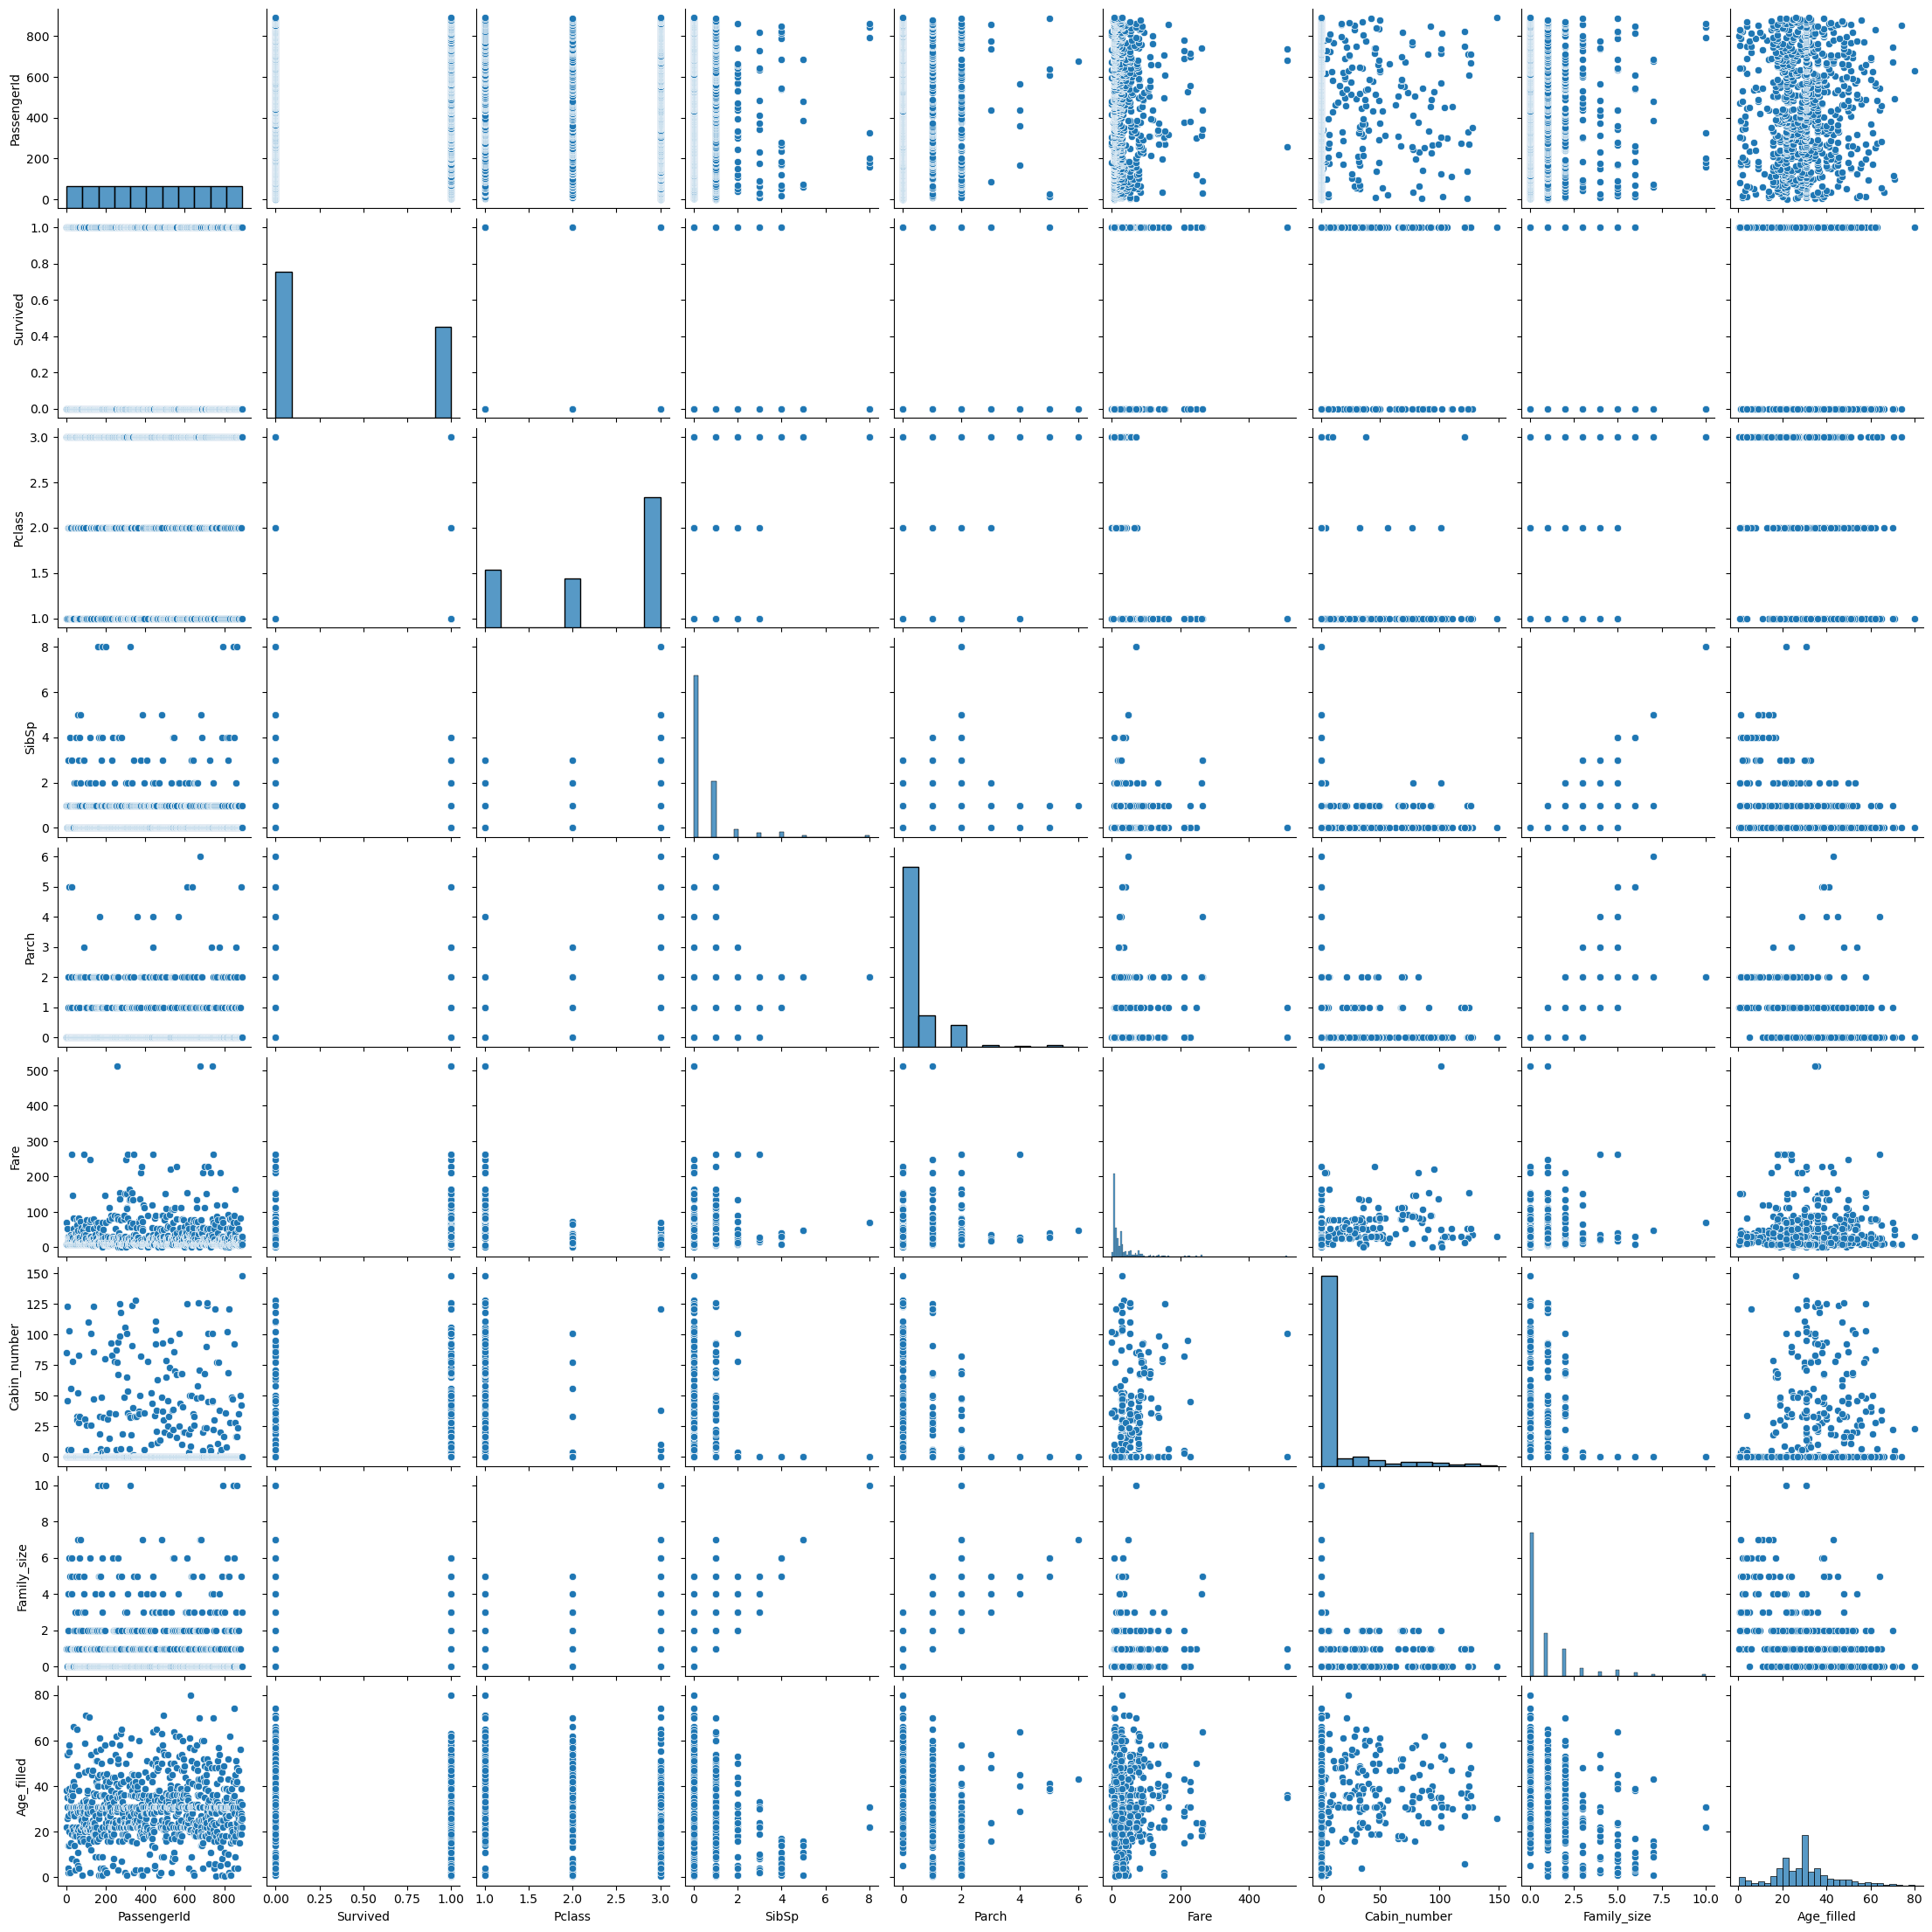

In [189]:
# MOst plots at one time :)
sns.pairplot(titanic)

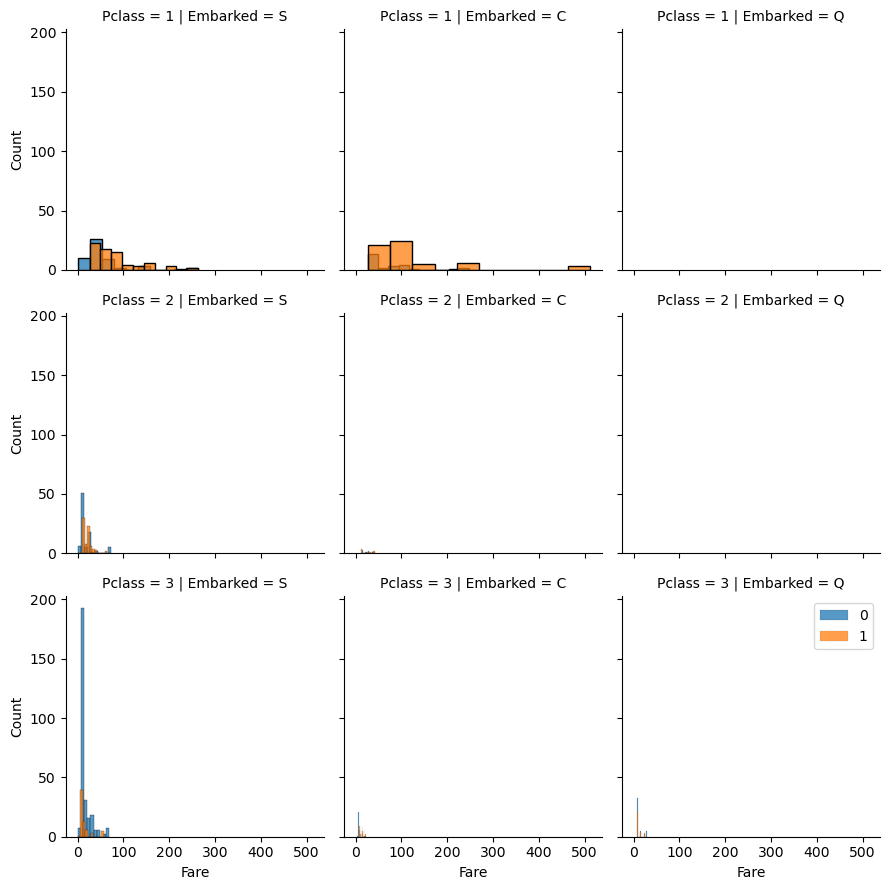

In [190]:
g = sns.FacetGrid(data=titanic, row='Pclass', col='Embarked', hue='Survived')
g.map(sns.histplot, 'Fare', bins=10)
plt.legend()

<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

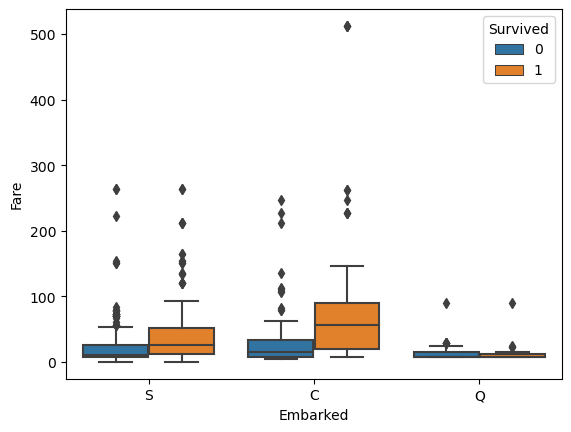

In [191]:
sns.boxplot(data=titanic, x='Embarked', y='Fare', hue='Survived')

<AxesSubplot: xlabel='Family_size', ylabel='Age_filled'>

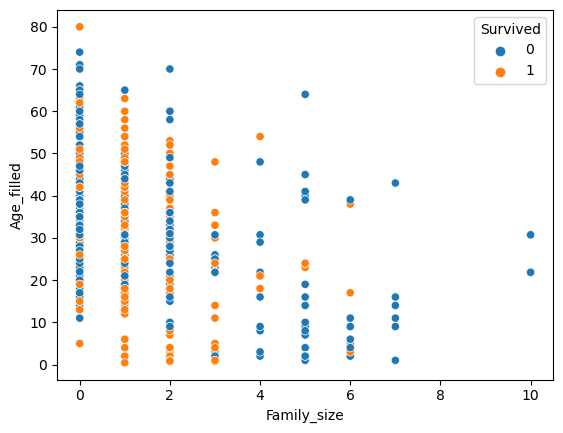

In [192]:
sns.scatterplot(x='Family_size', y='Age_filled', hue='Survived', data=titanic)

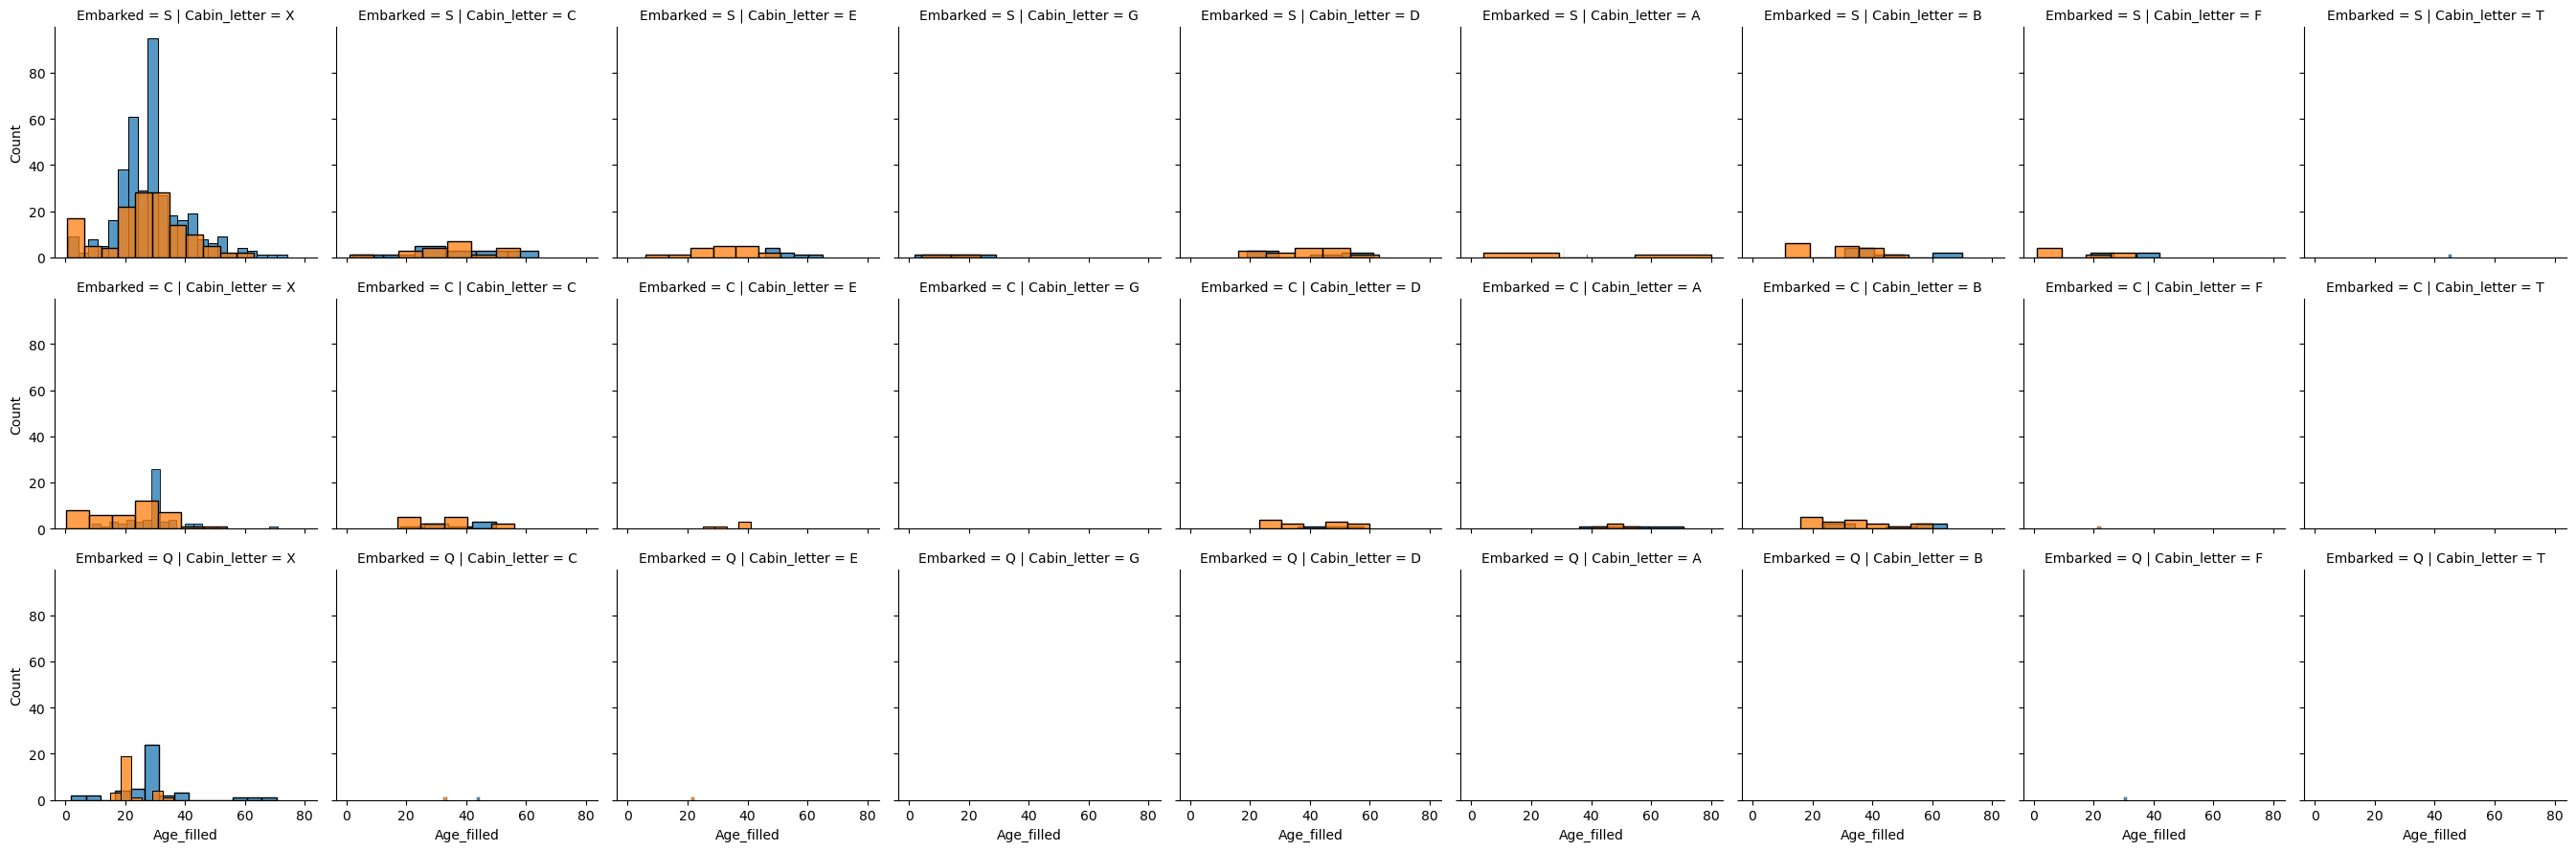

In [193]:
g = sns.FacetGrid(data=titanic, col='Cabin_letter', row='Embarked', hue='Survived')
g.map(sns.histplot, 'Age_filled')

<AxesSubplot: xlabel='Family_size', ylabel='Fare'>

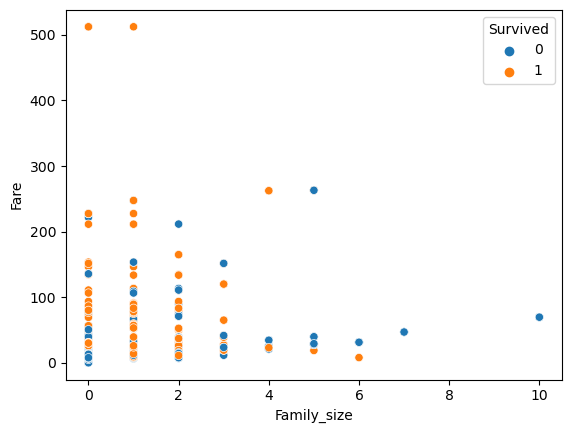

In [194]:
sns.scatterplot(x='Family_size', y='Fare', hue='Survived', data=titanic)

It's noticeable that there are some outliers in the set, however for now it's easier to leave it this way and check how the model will perform in terms of accuracy.

### 4. Preparing the data for model
As we've seen enough for now, we can try with our baseline model and see how it performs. Before, let's clean up the mess we've left while working with data and perform neccessary steps like one-hot encoding.

In [195]:
# Check the columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         889 non-null    object 
 9   Cabin_letter     891 non-null    object 
 10  Cabin_number     863 non-null    float64
 11  Family_size      891 non-null    int64  
 12  Title_condensed  891 non-null    object 
 13  Age_filled       891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [196]:
# From what we can see, one column can be deleted - 'Ticket' 
# as looks alike it's not useful and will generate a lot of new 
# entries while one-hot encoded.
titanic.drop('Ticket', axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_letter,Cabin_number,Family_size,Title_condensed,Age_filled
0,1,0,3,male,1,0,7.2500,S,X,0.0,1,Mr,22.0
1,2,1,1,female,1,0,71.2833,C,C,85.0,1,Mrs,38.0
2,3,1,3,female,0,0,7.9250,S,X,0.0,0,Miss,26.0
3,4,1,1,female,1,0,53.1000,S,C,123.0,1,Mrs,35.0
4,5,0,3,male,0,0,8.0500,S,X,0.0,0,Mr,35.0


In [197]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         889 non-null    object 
 8   Cabin_letter     891 non-null    object 
 9   Cabin_number     863 non-null    float64
 10  Family_size      891 non-null    int64  
 11  Title_condensed  891 non-null    object 
 12  Age_filled       891 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [198]:
# Time to one-hot encode the features
titanic_onehot = pd.get_dummies(titanic)
titanic_onehot.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Cabin_number,Family_size,Age_filled,Sex_female,...,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_X,Title_condensed_Miss,Title_condensed_Mr,Title_condensed_Mrs
0,1,0,3,1,0,7.2500,0.0,1,22.0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,1,1,1,0,71.2833,85.0,1,38.0,1,...,1,0,0,0,0,0,0,0,0,1
2,3,1,3,0,0,7.9250,0.0,0,26.0,1,...,0,0,0,0,0,0,1,1,0,0
3,4,1,1,1,0,53.1000,123.0,1,35.0,1,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,0,0,8.0500,0.0,0,35.0,0,...,0,0,0,0,0,0,1,0,1,0


In [199]:
titanic_onehot.drop('PassengerId', axis=1, inplace=True)
titanic_onehot.head()

,Survived,Pclass,SibSp,Parch,Fare,Cabin_number,Family_size,Age_filled,Sex_female,Sex_male,...,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_X,Title_condensed_Miss,Title_condensed_Mr,Title_condensed_Mrs
0,0,3,1,0,7.2500,0.0,1,22.0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,0,71.2833,85.0,1,38.0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,3,0,0,7.9250,0.0,0,26.0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,1,0,53.1000,123.0,1,35.0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,0,0,8.0500,0.0,0,35.0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [200]:
# Divide the data for test and train sets
X = titanic_onehot.drop('Survived', axis=1)
y = titanic_onehot['Survived']

#X = tf.constant(titanic_onehot.drop('Survived', axis=1))
#y = tf.constant(titanic_onehot['Survived'])

X.shape, y.shape

((891, 24), (891,))

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Creating the baseline model
Let's start with a basic model to see how it can perform with this dataset.

In [202]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
	tf.keras.layers.Dense(24, activation='relu'), # number of units equals the number of columns 
	tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
				optimizer=tf.keras.optimizers.SGD(),
				metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=250)

Epoch 1/250
 9/23 [==========>...................] - ETA: 0s - loss: 1.7639 - accuracy: 0.4965 

2023-01-22 13:09:03.609513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 9ms/step - loss: 1.1253 - accuracy: 0.5815
Epoch 2/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.6236
Epoch 3/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.6236
Epoch 4/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.6236
Epoch 5/250
23/23 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.6236
Epoch 6/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6791 - accuracy: 0.6236
Epoch 7/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.6236
Epoch 8/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6236
Epoch 9/250
23/23 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.6236
Epoch 10/250
23/23 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6236
Epoch 11/250
23/23 [=

In [ ]:
# Evaluate the model
pred_1 = model_1.evaluate(X_test, y_test)

# Get the predictions
values_1 = model_1.predict(X_test)
values_1

<AxesSubplot: >

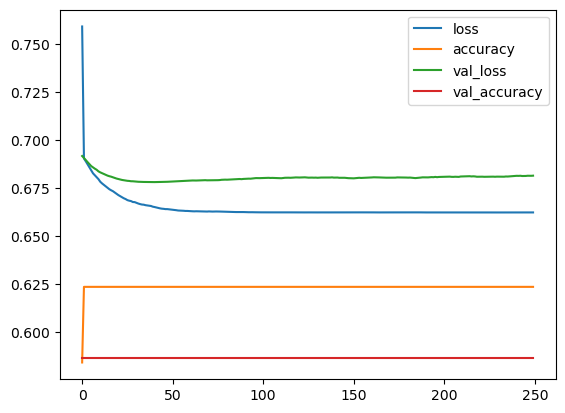

In [ ]:
# Plot the curves
pd.DataFrame(history_1.history).plot()

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, values_1.round())

array([[105,   0],
       [ 74,   0]])

Looks like model performs pretty poorly as it's predicting the same value all the time. Let's clean thing a bit and make a bit more functional.

### 6. Cleaning up the mess from earlier sections
Functionizing everything we did earlier so we'd be able to get a hang of what's been done.

In [20]:
# Importing all the tools needed
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [26]:
# Helper functions for preprocessing
def extract_first_letter(cabin):
	'''
	Extracting the first letter from a given cabin number. If the input is
	different, function returns 'NaN'.
	'''
	if type(cabin) == type('a'):
		return cabin[0]
	return 'X'


def extract_cabin_number(data):
	'''
	Extracting the number of the cabin. If there's none, returns NaN.
	'''
	if data['Cabin_letter'] != 'X':
		return data['Cabin'][1:]
	return 0


def title_extraction(title):
	'''
	Extracting the title from the 'Name' column.
	'''
	temp = title.split()

	for i in range(len(temp)):
		if '.' in temp[i]:
			return temp[i].split('.')[0]

def title_condensation(data):
	'''
	Condensing the amount of titles to smaller value.
	'''
	if data['Title'] in ['Miss', 'Mlle', 'Ms']:
		return 'Miss'
	
	elif data['Title'] in ['Mrs', 'Countess', 'Lady', 'Mme']:
		return 'Mrs'

	elif data['Title'] == 'Dr' and data['Sex'] == 'female':
		return 'Mrs'
		
	else:
		return 'Mr'

def age_filler(data):
	'''
	Fills up the NaN with proper age mean according to 
	title_condensed value. If age is already there, it's being
	carried unchanged.
	'''
	if data['Age_nan_True']:
		if data['Title_condensed'] == 'Miss':
			return miss_mean

		elif data['Title_condensed'] == 'Mr':
			return mr_mean

		else:
			return mrs_mean
	
	return data['Age']

In [27]:
# Function to preprocess the data engineering part
def preprocessing(titanic):
	'''
	Function that preprocesses the data enginnering/feature engineering
	part of loaded DataFrame.
	'''	
	#Extract cabin letter and number
	titanic['Cabin_letter'] = titanic['Cabin'].apply(lambda x: extract_first_letter(x))
	titanic['Cabin_number'] = titanic.apply(extract_cabin_number, axis=1)
	
	# Change type of cabin number column to numeric values
	titanic['Cabin_number'] = pd.to_numeric(titanic['Cabin_number'], errors='ignore')
	titanic['Cabin_number'].fillna(0)
	print('Cabin column done')

	# Create family size value column
	titanic['Family_size'] = titanic['SibSp'] + titanic['Parch'] + 1
	print('Family size created')

	# Create Fare per person column
	titanic['Fare_per_person'] = titanic['Fare'] / titanic['Family_size']+1
	print('Fare per person created')

	# Extracting the title from the name and making the total number smaller
	titanic['Title'] = titanic['Name'].apply(lambda x: title_extraction(x))
	titanic['Title_condensed'] = titanic.apply(title_condensation, axis=1)
	print('Titles extracted and condensed')

	# Calculating the mean age values per each title
	miss_mean = titanic.groupby('Title_condensed')['Age'].mean()['Miss']
	mr_mean = titanic.groupby('Title_condensed')['Age'].mean()['Mr']
	mrs_mean = titanic.groupby('Title_condensed')['Age'].mean()['Mrs']

	# Filling the missing age values
	titanic['Age_nan_True'] = titanic['Age'].isna()
	titanic['Age_filled'] = titanic.apply(age_filler, axis=1)
	print('Age column filled')

	# Dropping unnecessary columns
	del_cols = ['Cabin', 'Age', 'Age_nan_True', 'Title', 'Name', 'Ticket', 'PassengerId', 'Cabin_number']
	titanic.drop(del_cols, axis=1, inplace=True)	
	print('Columns deleted')

	# Return the preprocessed DataFrame
	return titanic

In [28]:
titanic = pd.read_csv('train.csv')
titanic = preprocessing(titanic)
titanic.info()

Cabin column done
Family size created
Fare per person created
Titles extracted and condensed
Age column filled
Columns deleted
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Embarked         889 non-null    object 
 7   Cabin_letter     891 non-null    object 
 8   Family_size      891 non-null    int64  
 9   Fare_per_person  891 non-null    float64
 10  Title_condensed  891 non-null    object 
 11  Age_filled       891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [29]:
titanic['Cabin_letter'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [93]:
# One hot encode the features and normalize the data in the set
def onehot_normalize(titanic):
	from sklearn.compose import make_column_transformer
	from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
	from sklearn.model_selection import train_test_split

	# Split the columns into linear and categorical ones
	linear_cols =['Pclass', 'SibSp', 'Parch', 'Fare', 
				'Family_size', 'Fare_per_person', 'Age_filled']

	categorical_cols = ['Sex', 'Embarked', 'Cabin_letter', 'Title_condensed']

	# Create a column transformer
	ct = make_column_transformer(
		(MinMaxScaler(), linear_cols),
		(OneHotEncoder(handle_unknown='ignore'), categorical_cols)
	)

	# Create X and y values
	X = titanic.drop('Survived', axis=1)
	y = titanic['Survived']

	# Split the data
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	# Fit the column transormer to the data
	ct.fit(X_train)

	# Transform train and test sets with normalization and one-hot encoder
	X_train_norm = ct.transform(X_train)
	X_test_norm = ct.transform(X_test)

	return X_train_norm, X_test_norm, y_train, y_test

In [41]:
X_train_norm.shape, X_train.shape

((712, 25), (712, 11))

### 7. Second attempt to create the model
Now with our data being nice and tidy, we can try to feed it into earlier proposed architecture - so let's recreate `model_1` but fit it with a bit nicer data.

In [48]:
# Second attempt with the model_2

# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_1)
model_2 = tf.keras.Sequential([
	tf.keras.layers.Dense(24, activation='relu'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
				optimizer=tf.keras.optimizers.SGD(),
				metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(X_train_norm, y_train, epochs=50, verbose=0)

2023-01-22 13:31:30.694653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [49]:
# Evaluate the model
model_2.evaluate(X_test_norm, y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.4782 - accuracy: 0.7821


2023-01-22 13:31:37.687092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.4781650900840759, 0.7821229696273804]

<AxesSubplot: >

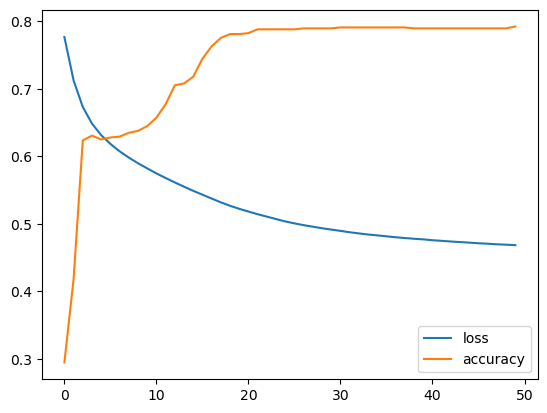

In [44]:
# Plot the curves 
pd.DataFrame(history_2.history).plot()

In [46]:
# Get the predictions
preds_2 = model_2.predict(X_test_norm)


6/6 [==============================] - 0s 3ms/step


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [54]:
# Let's check the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds_2.round())


array([[87, 18],
       [21, 53]])

Looks like our model started to predict something else than zeros all the time. Now it's time to refine it and try to get even better results.

This is the new baseline - **78.2% on validation data**.

In [56]:
# Now let's try to change the optimizer and increase the epochs 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
	tf.keras.layers.Dense(24, activation='relu'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(X_train_norm, y_train, epochs=100, verbose=0)

2023-01-22 13:38:45.273906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [57]:
# Evaluate the model
model_3.evaluate(X_test_norm, y_test)

6/6 [==============================] - 0s 12ms/step - loss: 0.4500 - accuracy: 0.7877


2023-01-22 13:39:06.506531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.44995227456092834, 0.7877095341682434]

<AxesSubplot: >

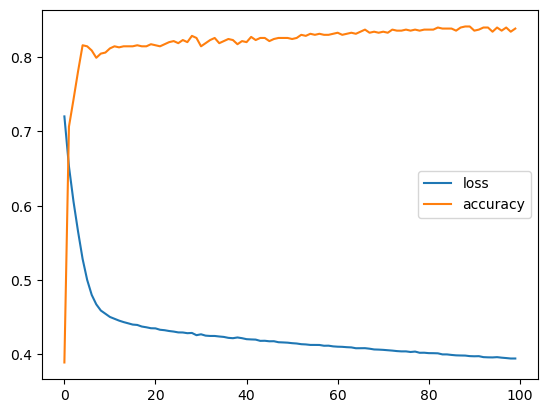

In [58]:
# Plot the curves
pd.DataFrame(history_3.history).plot()

Looks like the loss keeps getting even lower after 100 epochs. Let's increase the number up to 300 and see the results. But before - we'll use the evaluation and plotting the curves quite often. Functionizig this sounds like a good idea.

In [65]:
def evaluate_and_plot(model, history, X_test=X_test_norm, y_test=y_test):
	'''
	Function to help with model evaluation same as with
	plotting the loss curves and creating the basic 
	confusion matrix.
	'''
	# Evaluate the model
	print("Model evaluation metrics:")
	model.evaluate(X_test, y_test)

	# Make the predictions
	preds = model.predict(X_test)

	# Show the confusion matrix
	print("Confusion matrix:")
	print(confusion_matrix(y_test, preds.round()))

	# Plot the curves
	pd.DataFrame(history.history).plot()
	plt.title('Loss curves')

Model evaluation metrics:
6/6 [==============================] - 0s 2ms/step
Confusion matrix:
[[88 17]
 [21 53]]


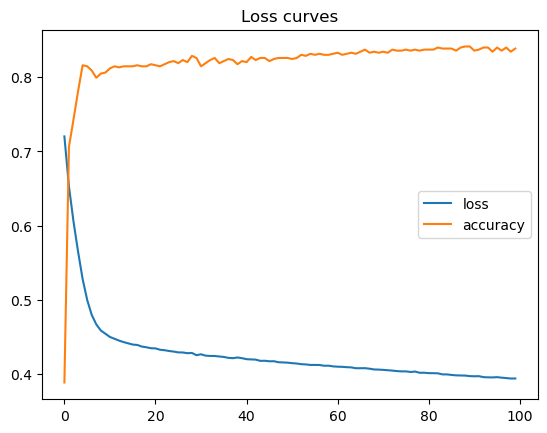

In [66]:
# Try out new function
evaluate_and_plot(model=model_3, history=history_3)

Saving some keystrokes would also be nice - let's import some classes and features from TensorFlow :)

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [74]:
# Let's go with model_4 (300 epochs vs 100 in model_3)

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = Sequential([
	Dense(24, activation='relu'),
	Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
				optimizer=Adam(),
				metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(X_train_norm, y_train, epochs=300, verbose=0)

2023-01-22 14:03:12.517413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Model evaluation metrics:
6/6 [==============================] - 0s 3ms/step


2023-01-22 14:01:25.402077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-22 14:01:25.566924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Confusion matrix:
[[88 17]
 [20 54]]


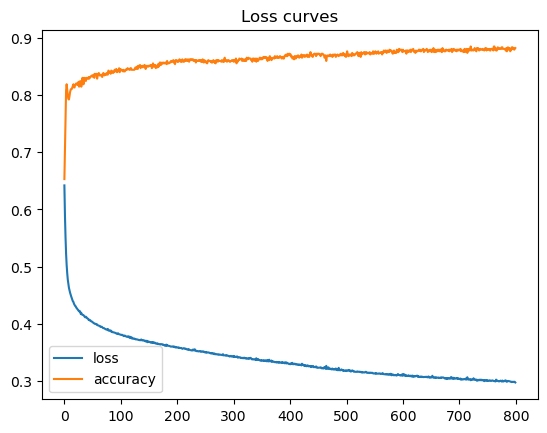

In [73]:
evaluate_and_plot(model=model_4, history=history_4)

Accuracy rose a bit, however it's not enough and I believe the model can be even better. Let's try adding on some new layers in the model.

2023-01-22 21:46:08.795713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Model evaluation metrics:
1/6 [====>.........................] - ETA: 0s

2023-01-22 21:46:21.603692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-22 21:46:21.782176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 4ms/step
Confusion matrix:
[[  0 105]
 [  0  74]]


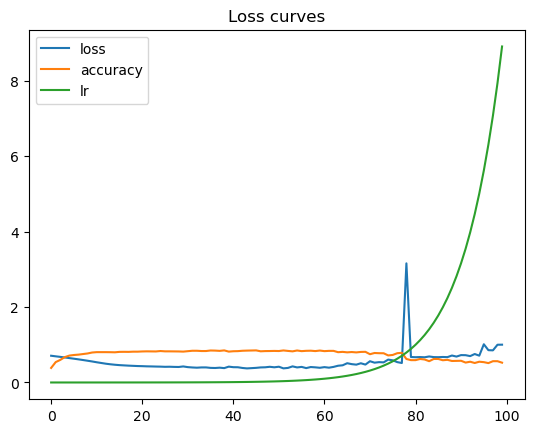

In [79]:
# Model_5 (same as model_3, but more layers), but also 
# include the Learning Rate Scheduler to fit optimal 
# learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = Sequential([
	Dense(24, activation='relu'),
	Dense(12, activation='relu'),
	Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss=BinaryCrossentropy(),
				optimizer=Adam(),
				metrics=['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model
history_5 = model_5.fit(X_train_norm, y_train, epochs=100, verbose=0, callbacks=[lr_scheduler])

evaluate_and_plot(model=model_5, history=history_5)

In [82]:
lrs = 1e-4 * (10**(tf.range(100)/20))

Text(0.5, 1.0, 'Learning rate vs loss')

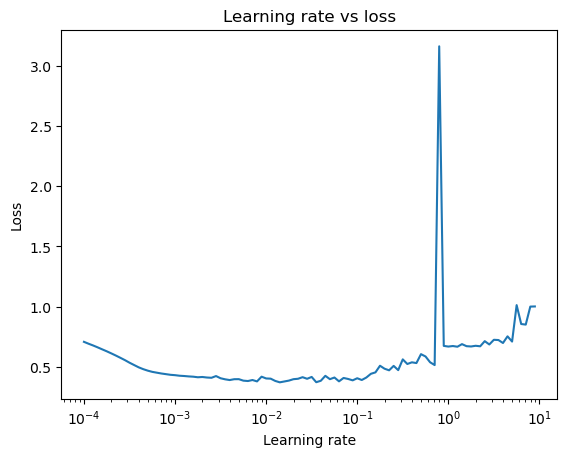

In [83]:
# Plotting the learning rate vs loss curve
plt.figure()
plt.semilogx(lrs, history_5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

Adam's default learning rate is *0.001*, however we can try to compile a model with a slightly higher value of *0.01*. This is what will be done with `model_6`.

Epoch 1/300


2023-01-22 22:40:58.560798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 90ms/step - loss: 0.6857 - accuracy: 0.5251 - val_loss: 0.6442 - val_accuracy: 0.7263
Epoch 2/300
1/6 [====>.........................] - ETA: 0s - loss: 0.6301 - accuracy: 0.8125

2023-01-22 22:40:59.048659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 19ms/step - loss: 0.6285 - accuracy: 0.7542 - val_loss: 0.6007 - val_accuracy: 0.7765
Epoch 3/300
6/6 [==============================] - 0s 18ms/step - loss: 0.5821 - accuracy: 0.7709 - val_loss: 0.5535 - val_accuracy: 0.7709
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 0.5392 - accuracy: 0.7709 - val_loss: 0.5091 - val_accuracy: 0.7709
Epoch 5/300
6/6 [==============================] - 0s 17ms/step - loss: 0.4972 - accuracy: 0.7709 - val_loss: 0.4791 - val_accuracy: 0.7709
Epoch 6/300
6/6 [==============================] - 0s 16ms/step - loss: 0.4726 - accuracy: 0.7709 - val_loss: 0.4596 - val_accuracy: 0.7709
Epoch 7/300
6/6 [==============================] - 0s 14ms/step - loss: 0.4579 - accuracy: 0.7709 - val_loss: 0.4480 - val_accuracy: 0.7765
Epoch 8/300
6/6 [==============================] - 0s 15ms/step - loss: 0.4456 - accuracy: 0.7933 - val_loss: 0.4382 - val_accuracy: 0.8212
Epoch 9/300
6/6 [===============

2023-01-22 22:41:22.289524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


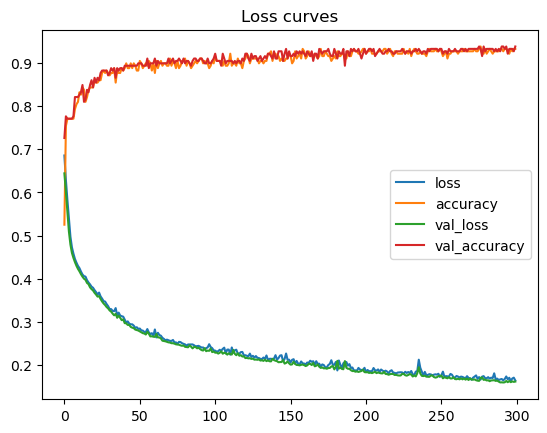

In [137]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = Sequential([
	Dense(24, activation='relu'),
	Dense(12, activation='relu'),
	Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss=BinaryCrossentropy(),
				optimizer=Adam(learning_rate=0.005),
				metrics=['accuracy'])

# Fit the model (now with validation data, too)
history_6 = model_6.fit(X_test_norm, y_test, epochs=300, verbose=1, validation_data=(X_test_norm, y_test), validation_split=0.8)

# Evaluation
evaluate_and_plot(model_6, history_6)

In [138]:
# First submission
titanic_test = pd.read_csv('test.csv')
test_ids = titanic_test['PassengerId']

# Preprocess all the data
titanic_test = preprocessing(titanic_test)

Cabin column done
Family size created
Fare per person created
Titles extracted and condensed
Age column filled
Columns deleted


In [139]:
# Transform the real test data
X_test_sub_norm = ct.transform(titanic_test)
X_test_sub_norm.shape

# Make predictions
preds_sub = model_6.predict(X_test_sub_norm)
preds_sub.round()

# Create a dataframe to export submission
submission = {'PassengerId':test_ids, 'Survived': preds_sub.round().flatten()}
export = pd.DataFrame(data=submission)
export['Survived'] = pd.to_numeric(export['Survived'], downcast='integer')
export.to_csv('submission_tf_1.csv', index=False)

14/14 [==============================] - 0s 3ms/step


After submission, it turned out that the score is 0.72488 (so 72.48%). This is the new baseline on REAL test data. Clean-up the mess above and let's try to improve even more.<br><br>

>**EDIT 22.01.2023**: Some fast tweaks lead to score rising to 0.75837 (so 75.73%) on REAL test data. That's a small improvement.